# Titanic Passenger Survival Prediction

## Project Overview

This project focuses on predicting whether a passenger survived the sinking of the Titanic based on various features like ticket class, age, gender, and family relations aboard the ship. The dataset provides detailed information about each passenger, enabling the use of classification models to predict survival outcomes. This project demonstrates the use of machine learning classification techniques on one of the most famous datasets in the field of data science.

## Source

This dataset is vailable on Kaggle in the following link:

> https://www.kaggle.com/c/titanic/data

## Data Dictionary

The dataset contains the following columns:

- **survival**: Survival (0 = No, 1 = Yes)
- **pclass**: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **sex**: Gender of the passenger
- **age**: Age of the passenger in years
- **sibsp**: Number of siblings/spouses aboard the Titanic
- **parch**: Number of parents/children aboard the Titanic
- **ticket**: Ticket number
- **fare**: Passenger fare
- **cabin**: Cabin number
- **embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Variable Notes

- **pclass**: A proxy for socio-economic status (SES)
  - 1st = Upper class
  - 2nd = Middle class
  - 3rd = Lower class

- **age**: Age is fractional if less than 1. If the age is estimated, it is in the form of `xx.5`.

- **sibsp**: Number of siblings/spouses aboard the Titanic.
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (mistresses and fiancés were ignored)

- **parch**: Number of parents/children aboard the Titanic.
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson
  - Some children traveled only with a nanny, therefore `parch=0` for them.

## Objective

The goal of this project is to build a classification model that predicts the survival of passengers aboard the Titanic based on the provided features. The project includes data exploration, feature engineering, model building, and evaluation of classification models.

### Problem Statement

- **Exploratory Data Analysis(EDA)**: The objective of EDA is to analyze the features of dataset, find the hidden patterns present in the data so that prediction can be made wheather a passenger has been survived or not.
- **Data Cleaning**: Clean the data to remove or impute null or missing values, outliers, duplicate rows etc.

### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
import warnings

### Settings

In [2]:
# Warnings
warnings.filterwarnings("ignore")

# Plot
sns.set_style("darkgrid")

# Path
data_path = "../data"
csv_path = os.path.join(data_path, "titanic.csv")

### Load Data

In [3]:
df = pd.read_csv(csv_path)

In [4]:
# Check 1st 5 rows of the dataset to get an idea about the data stored in each feaure
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis

First find the generaal information about the dataset and analyze the features to find the hidden patterns present in the data.

In [5]:
# Data Description
print("=" * 60)
print("DATA DESCRIPTION")
print("=" * 60)
print(f"Number of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

DATA DESCRIPTION
Number of observations: 891
Number of features: 12


In [6]:
# Feature Description
print("=" * 60)
print("FEATURE DESCRIPTION")
print("=" * 60)
print(df.dtypes)
num_features = [ col for col in df.columns if df[col].dtype != "object"]
cat_features = [col for col in df.columns if df[col].dtype == "object"]
print("-" * 60)
print(f"Number of numerical features: {len(num_features)}")
print(num_features)
print("-" * 60)
print(f"Number of categorical features: {len(cat_features)}")
print(cat_features)
print("-" * 60)
unique_features = [ col for col in df.columns if df[col].nunique() == df.shape[0]]
print(f"Number of features containing unique values: {len(unique_features)}")
print(unique_features)

FEATURE DESCRIPTION
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
------------------------------------------------------------
Number of numerical features: 7
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
------------------------------------------------------------
Number of categorical features: 5
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
------------------------------------------------------------
Number of features containing unique values: 2
['PassengerId', 'Name']


### Key Findings

- PassengerId and Name contains unique values for each observation. So these 2 features will not help to find any pattern in the data to the machine learning model. So these 2 features should be dropped.

In [7]:
# Missing or Null Value Detection
print("=" * 60)
print("MISSING VALUE DETECTION")
print("=" * 60)
if df.isnull().sum().sum() > 0:
    print(df.isnull().sum())
else:
    print("No missing value present in any feature.")

MISSING VALUE DETECTION
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Key Findings

- Age feature has **177** missing values. This values needs to be imputed.
- Cabin feature has **687** missing values. This is almost **77%** of total observations which is huge. So This feature should be dropped.

In [8]:
# Duplicate Row Detection
print("=" * 60)
print("DUPLICATE ROW DETECTION")
print("=" * 60)
print(f"Number of duplicate rows: {df.duplicated().sum()}")

DUPLICATE ROW DETECTION
Number of duplicate rows: 0


### Target Analysis (Understanding the Survival Rate)

Analyze the distribution of target variable(**Survived**)

SURVIVAL RATE
Survived
0    549
1    342
Name: count, dtype: int64


Text(0.5, 0, 'Survived')

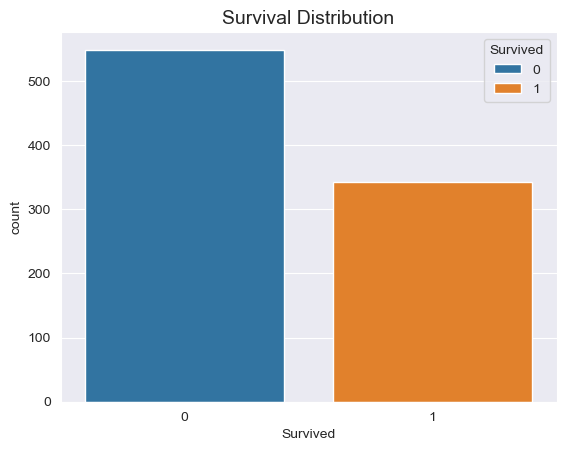

In [9]:
# Find Survival rate
survival_rate = df["Survived"].value_counts()
print("=" * 60)
print("SURVIVAL RATE")
print("=" * 60)
print(survival_rate)

# Visualize Survival Rate
sns.countplot(data= df, x = "Survived", hue="Survived")
plt.title("Survival Distribution", fontsize= 14)
plt.xlabel("Survived")

### Key Findings

- From Target Analysis it is found that **39%** passengers have been survived.

### Gender Analysis(Impact of Gender on Survival)

Explore whether gender(sex) had any impact on survival rate.

GENDER ANALYSIS
      Sex  Survived
0  female  0.742038
1    male  0.188908


Text(0.5, 0, 'Sex')

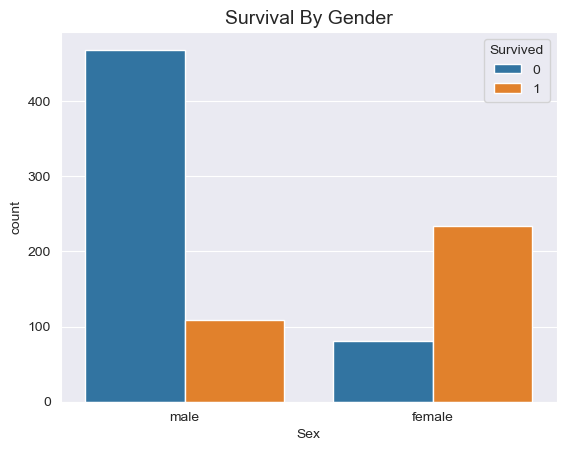

In [20]:
# Calculate the survival rate by gender
survival_gender = df.groupby("Sex")["Survived"].mean().reset_index()
print("=" * 60)
print("GENDER ANALYSIS")
print("=" * 60)
print(survival_gender)

# Visualize the Gander-based survival count
sns.countplot(data= df, x= "Sex", hue= "Survived")
plt.title("Survival By Gender", fontsize= 14)
plt.xlabel("Sex")

### Key Findings

- Females had much higher survival rate than male passengers. This aligns with the historical fact that women and children are rescued first.

### Age Analysis (Effect of Age on Survival)

Visualize how age influenced the survival by looking at the distribution and survival rates accross the different age group.

Text(0.5, 1.0, 'Survaibal Based on Age')

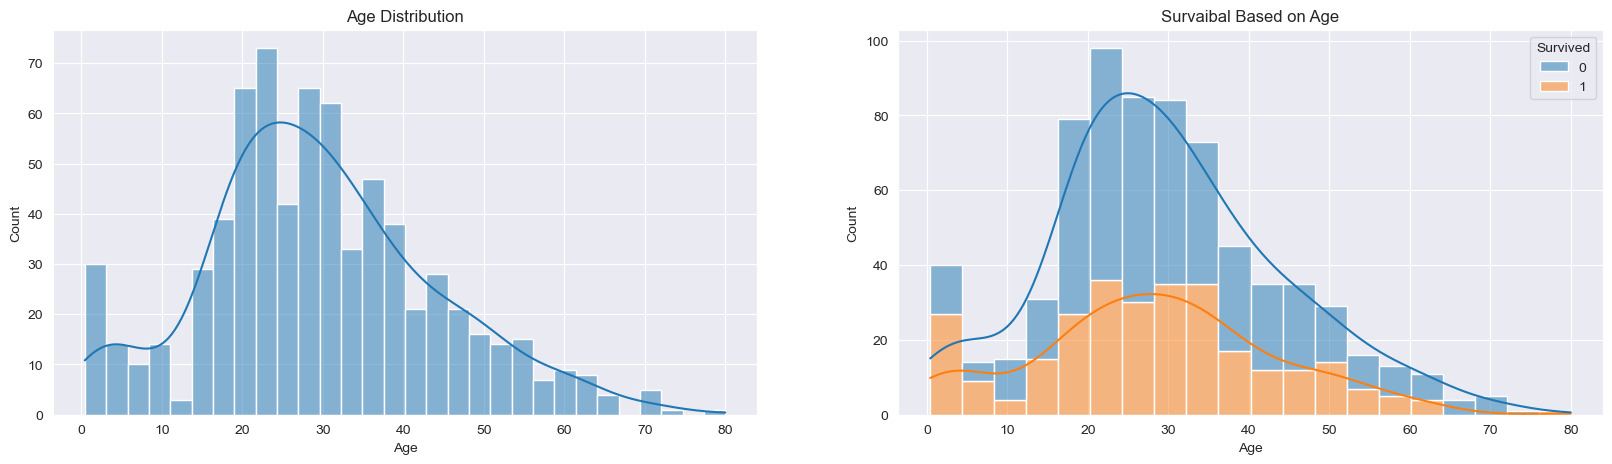

In [11]:
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize= (20, 5))

# Age Distribution
sns.histplot(df["Age"].dropna(), kde= True, bins= 30, ax= axes[0])
axes[0].set_title("Age Distribution")

# Survival Vs. Age
sns.histplot(data= df, x= "Age", hue = "Survived", kde= True, multiple= "stack" , ax= axes[1])
axes[1].set_title("Survaibal Based on Age")

### Key Findings

- Survival Rate of younger passengers(esplcially children) are high which reflects the **Women and Children reccue first** policy.

### Passenger Class Analysis(Impact of Passenger Class on Survival)

Analyze the survival rate based on passenger class(Pclass)

PASSENGER CLASS ANALYSIS
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


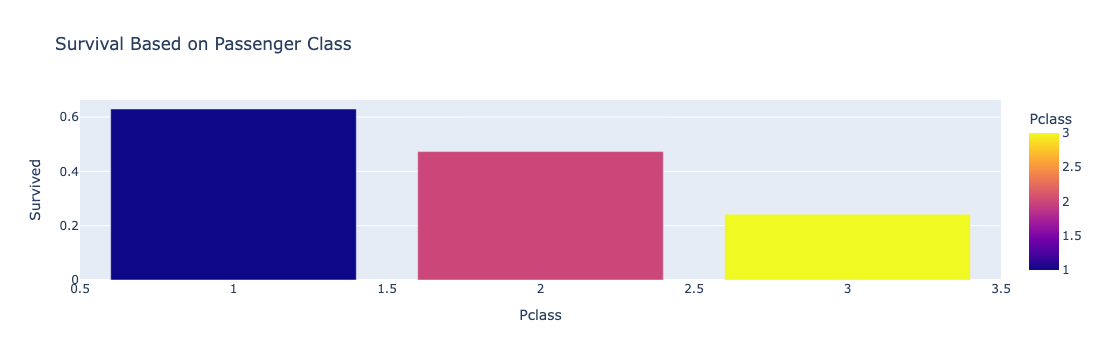

In [25]:
# Calculate the survival rate for each class
pclass_survival = df.groupby("Pclass")["Survived"].mean().reset_index()
print("=" * 60)
print("PASSENGER CLASS ANALYSIS")
print("=" * 60)
print(pclass_survival)

# Survival rate based on class
px.bar(pclass_survival, x= "Pclass", y= "Survived", color= "Pclass", title= "Survival Based on Passenger Class")
# sns.countplot(data=df, x= "Survived", hue="Pclass")
# plt.title("Survival Based on Passenger Class", fontsize= 14)

### Key Findings

- Passengers of **1st** class had significantly higher survival rate compared to those in the **3rd** class.

### Embarked Location Analysis(Impact of Embarked Location on Survival Rate)

Analyze if the port of embarktion had any influence on survival

EMBARKED LOCATION ANALYSIS
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


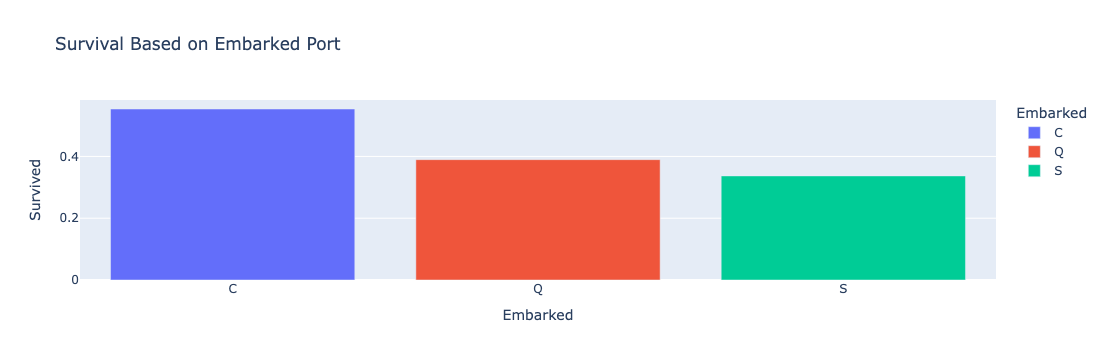

In [26]:
# Calculate survival rate according to the embarked port
embarked_survival = df.groupby('Embarked')["Survived"].mean().reset_index()
print("=" * 60)
print("EMBARKED LOCATION ANALYSIS")
print("=" * 60)
print(embarked_survival)

# Visualize survival based on embarked port
px.bar(embarked_survival, x="Embarked", y= "Survived", color= "Embarked", title="Survival Based on Embarked Port")
# sns.countplot(data= df, x= "Survived", hue= "Embarked")
# plt.title("Survival Based on Embarked Port")

### Key Findings

- Passengers embarked from **C** (Cherbourg) had higher survival rate than the passengers embarked from other ports.

### Fare-Survival Analysis (Effect of Fare on Survival)

Analyze how ticket fare affected sauvival

Text(0.5, 1.0, 'Survival Vs. Fare')

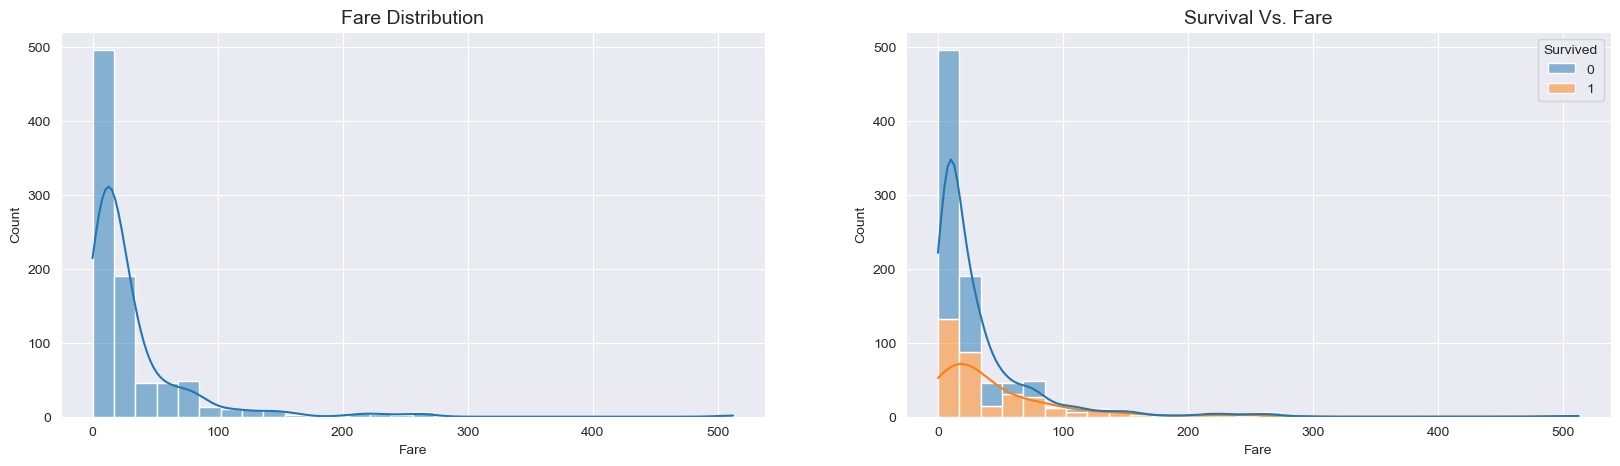

In [24]:
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize=(20, 5))

# Fare Distribution
sns.histplot(data= df, x= "Fare", bins= 30, kde= True, ax= axes[0])
axes[0].set_title("Fare Distribution", fontsize= 14)

# Survival Vs. Fare
sns.histplot(data= df, x= "Fare", hue= "Survived", bins= 30, multiple="stack", kde= True, ax= axes[1])
axes[1].set_title("Survival Vs. Fare", fontsize= 14)

### Key Findings

- Survival of high ticket fare is higher because 1st class tickets are more expensive.

### Family Size-Survival Analysis (Impact of family size on survival)

Combine the **SibSp**(Sibling/Spouse) and **Parch**(Parent/Child) with passenger to analyze family size and its impact on survival

FAMILY SIZE ANALYSIS
   FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000


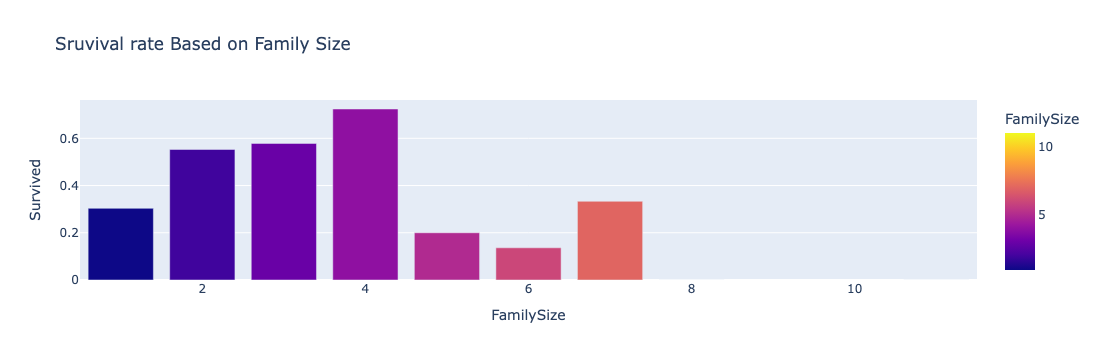

In [29]:
# Create a new feature family size by combining SibSp, Parch
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1 # Added 1 for the passenger

# Calculate survival rate based on family size
survival_family = df.groupby("FamilySize")["Survived"].mean().reset_index().sort_values("Survived", ascending= False)
print("=" * 60)
print("FAMILY SIZE ANALYSIS")
print("=" * 60)
print(survival_family)

# Visualize Survival rate based onfamily size
px.bar(survival_family, x= "FamilySize", y= "Survived", color= "FamilySize", title="Sruvival rate Based on Family Size")

### Key Findings

Passengers travelling with smaller family size(2-4 members) had survived higher than the passenger travelling alone or with very large family.

### Maltivariate Analysis(Gender, Age and Passenger Class)

Let's combine the Age, Gender and Passenger class and analyze how these 3 factors together affected the survival.

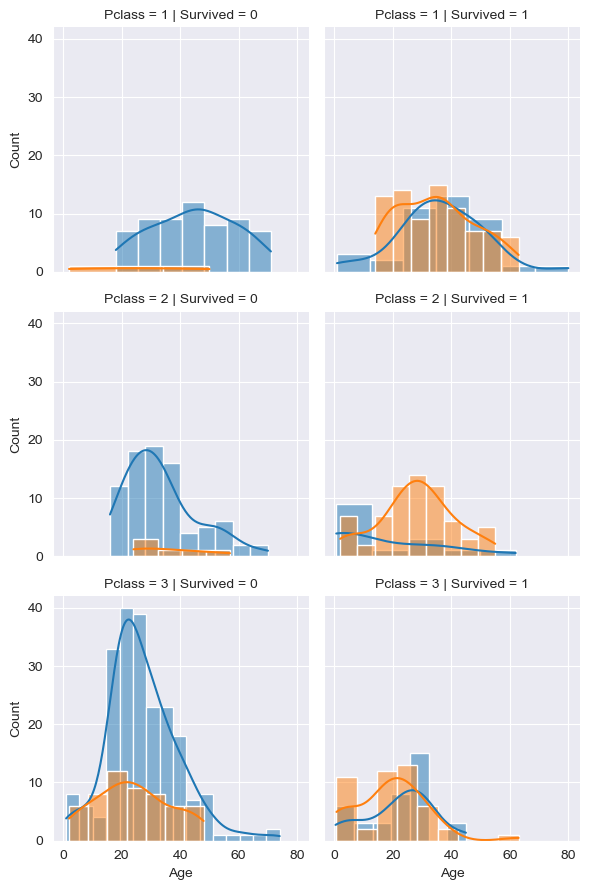

In [30]:
# Facet Grid for survival for gender and passenger class
g= sns.FacetGrid(df, col= "Survived", row= "Pclass", hue="Sex")
g.map(sns.histplot, "Age", kde=True)

### Key Findings

- **Females** of **1st** Class had very high survival rate, whereas **Males** of **3rd** class had very low survival rate.
- Younger **Females** of all classes had high survival rate.

### Data Cleaning

In [34]:
# Remove PassengerId and Name as they contains unique value in each observation.
# Remove Cabin as it contains 77% missing values
# Remove Ticket which contains the ticket number which will not help in prediction.

df.drop(["PassengerId", "Name", "Cabin", "Ticket"], axis= 1, inplace= True)
# Sanity Check
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


In [36]:
# Missing Value Imputation for Embarked
# Impute the Mode as it is a categorical feature
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
# Sanity check
df.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        0
FamilySize      0
dtype: int64

In [37]:
# Impute the Age with its mean as it is numeric feature
df["Age"] = df["Age"].fillna(df["Age"].mean())
# Sanity check
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
dtype: int64

### Feature Encoding

In [40]:
# Encode the categorical features with one hot encoding to convert them to numrical value so that we can use them in ML model.
df_encoded = pd.get_dummies(df, drop_first= True, dtype= "int")

# Sanity Check
df_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,2,1,0,1
1,1,1,38.0,1,0,71.2833,2,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,2,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


### Correlation Analysis

Find linear correlation among the numerical features with Pearson's correlation co-efficient.

In [42]:
# Find the correlation matrix
corr_matrix = df_encoded.corr()
corr_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.016639,-0.543351,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.065997,0.131900,0.221009,0.074053
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.248512,0.084153,-0.013855,-0.019336
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,0.890712,-0.114631,-0.026354,0.068734
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.783111,-0.245489,-0.081228,0.060814
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.217138,-0.182333,-0.117216,-0.162184
FamilySize,0.016639,0.065997,-0.248512,0.890712,0.783111,0.217138,1.000000,-0.200988,-0.058592,0.077359
Sex_male,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,-0.200988,1.000000,-0.074115,0.119224
Embarked_Q,0.003650,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,-0.058592,-0.074115,1.000000,-0.499421
Embarked_S,-0.149683,0.074053,-0.019336,0.068734,0.060814,-0.162184,0.077359,0.119224,-0.499421,1.000000


<Axes: >

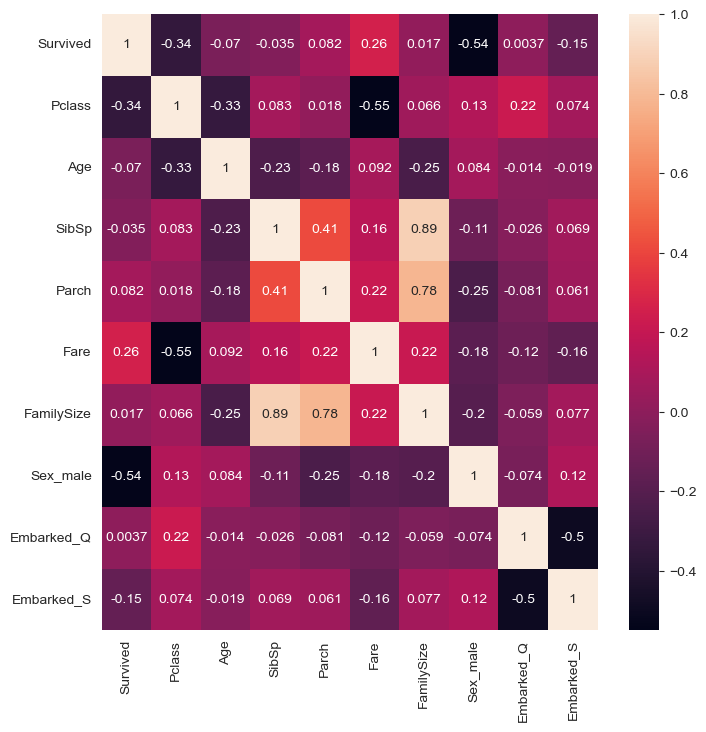

In [43]:
# Visualize correlation matrix with heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot= True)

### Save Encoded DataFrame

In [44]:
encoded_path = os.path.join(data_path, "titanic_en.csv")
df_encoded.to_csv(encoded_path, index= False)